<a href="https://colab.research.google.com/github/LeJ-04/amazon-products-rating-ml-project/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/LeJ-04/amazon-products-rating-ml-project.git
%cd amazon-products-rating-ml-project

Cloning into 'amazon-products-rating-ml-project'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 2.20 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/amazon-products-rating-ml-project


Libraries

In [4]:
# Mandatory libraries
import pandas as pd
import numpy as np

# Cleaning reviews
import re
import string

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Models and Evaluations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
data_original = pd.read_csv('amazon.csv')
data = data_original.copy()

# **Part 1: Analysation & Data Cleaning**

### 1.0. Loading & Initial Exploratory Data

In [6]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

The type of all the values is object for all the columns.
The values in the 'rating' column are objects and not float because of the symbol '₹'. We need to convert this column to get numeric values.  

In [9]:
data.describe(include='all')['product_name']

,product_name
count,1465
unique,1337
top,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat..."
freq,5


Among these 1465 products, 1337 are unique.

In [10]:
data.describe(include='all')['rating']

,rating
count,1465
unique,28
top,4.1
freq,244


As the values in the rating column are objects, we can't observe the min, max and mean of the rating. We need to transform them with a function.

### 1.1. Cleaning

In [11]:
data.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


We notice that the values are missing in the 'rating_count', 2 in total.

We check if rating, review_title and review_content have missing values. It is crucial to clean the dataset, otherwise the NLP part won't work (we already saw but we use different methods better for the visualization).

In [12]:
nb_missing_rating = data['rating'].isna().sum()
print("missing rating ?",  nb_missing_rating)
nb_missing_review_title = data['review_title'].isna().sum()
print("missing review_title ?", nb_missing_review_title)
nb_missing_review_content = data['review_content'].isna().sum()
print("missing review_content ?", nb_missing_review_content)

missing rating ? 0
missing review_title ? 0
missing review_content ? 0


In [13]:
display("Actual price column", data.actual_price.head())
display("Discounted price column", data.discounted_price.head())
display("Rating count column", data.rating_count.head())

'Actual price column'

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399


'Discounted price column'

,discounted_price
0,₹399
1,₹199
2,₹199
3,₹329
4,₹154


'Rating count column'

,rating_count
0,"24,269"
1,"43,994"
2,"7,928"
3,"94,363"
4,"16,905"


Like we said, certains columns are not in the right format. For the data manipulation, we need to transform the data type, especially in the actual price, discounted price and the rating count to change the type from object  into numerical values.  

Define cleaning function for currency strings



In [14]:
def clean_currency(x):
    if isinstance(x, str):
        # Remove the rupee symbol and commas, then convert to float
        x = x.replace('₹', '').replace(',', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

Apply cleaning to Numerical Variables

In [15]:
data['discounted_price'] = data['discounted_price'].apply(clean_currency)
data['actual_price'] = data['actual_price'].apply(clean_currency)
data['rating_count'] = data['rating_count'].apply(clean_currency)

In [16]:
display("Columns after cleaning the columns")
display("Actual price column", data.actual_price.head())
display("Discounted price column", data.discounted_price.head())
display("Rating count column", data.rating_count.head())

'Columns after cleaning the columns'

'Actual price column'

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0


'Discounted price column'

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0


'Rating count column'

,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0


In [17]:
data.discount_percentage.head()

,discount_percentage
0,64%
1,43%
2,90%
3,53%
4,61%


We need also to to get the discount percentage column into nummerical column.

In [18]:
data['discount_percentage'] = data['discount_percentage'].astype(str).str.replace('%', '').astype(float)
data.discount_percentage.head()

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0


We also clean the rating column (handling any non-numeric chars).

In [19]:
data.rating.isna().sum()

np.int64(0)

In [20]:
for i,r in enumerate(data.rating):
    if type(r) is not str:
      print("index:",i, "| rating:", r)

In [21]:
data['rating'] = pd.to_numeric(data['rating'].astype(str).str.replace('|', '', regex=False), errors='coerce')
data.rating.head()

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2


In [22]:
data.rating.isna().sum()

np.int64(1)

Here, after applying the function in the rating column, we identify 1 missing value. Therefore, we drop rows where critical text and numeric values are missing (even if we already check for the review content and review title.)

In [23]:
data.dropna(subset=['rating', 'review_content', 'review_title'], inplace=True)

Like we said in the analysis data part, there are some missing values detected and imputed in rating count. Instead of removing the lines, we fill the empty values with the median imputation.

In [24]:
print("missing values in 'rating_count' (before): ",data.rating_count.isna().sum())

rating_count_median = data['rating_count'].median()
data['rating_count'] = data['rating_count'].fillna(rating_count_median)

print("missing values in 'rating_count' (after the filling):",data.rating_count.isna().sum())

missing values in 'rating_count' (before):  2
missing values in 'rating_count' (after the filling): 0


We don't need to handle text and rating missing values because there isn't missing values.

In [25]:
data.category.head()

,category
0,Computers&Accessories|Accessories&Peripherals|...
1,Computers&Accessories|Accessories&Peripherals|...
2,Computers&Accessories|Accessories&Peripherals|...
3,Computers&Accessories|Accessories&Peripherals|...
4,Computers&Accessories|Accessories&Peripherals|...


Here, the text (product's category) is unreadable so to fix it, we extract the root category in a new feature column.

In [26]:
data['main_category'] = data['category'].astype(str).str.split('|').str[0]
data.main_category.head()

,main_category
0,Computers&Accessories
1,Computers&Accessories
2,Computers&Accessories
3,Computers&Accessories
4,Computers&Accessories


In this dataset, there are many review in different language, like hindi review : we need to convert all the review in just one language (in this project, it must be in english).

To do this, firstly, we use the library "langdetect" to identify the language of each review_content.

In [27]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=9da052f0476134718f894778f1c95b1f94e9b8db0ea2de01ea412728ccc3e393
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


We create a function that return the review's language. The funcion returns a error message if the function can't identify the language or the reviews are too short or empty.

In [28]:
from langdetect import detect, DetectorFactory, LangDetectException
import warnings

DetectorFactory.seed = 0
warnings.filterwarnings("ignore", category=UserWarning, module='langdetect')

def detect_safe(text):
    if not isinstance(text, str) or len(text.strip()) < 10:
        return 'short_or_empty'
    try:
        return detect(text)
    except LangDetectException:
        return 'error'

In [29]:
data['language_rtitle'] = data['review_title'].apply(detect_safe)
data['language_rcontent'] = data['review_content'].apply(detect_safe)

display("Language review_title",data['language_rtitle'].value_counts())
display("Language review_content", data['language_rcontent'].value_counts())

'Language review_title'

,count
language_rtitle,
en,1461
pt,1
te,1
short_or_empty,1


'Language review_content'

,count
language_rcontent,
en,1462
te,1
hi,1


We can display the non-englsih reviews

In [30]:
non_english_rtitle = data[ (data['language_rtitle'] != 'en') & (data['language_rtitle'] != 'short_or_empty') ]
non_english_rcontent = data[ (data['language_rcontent'] != 'en') & (data['language_rcontent'] != 'short_or_empty') ]

for index, row in non_english_rtitle.iterrows():
    print("Index", index,":")
    print(f"\tReview Title: {row['review_title']}")
    print(f"\tReview Title language: {row['language_rtitle']}")
for index, row in non_english_rcontent.iterrows():
    print("Index", index,":")
    print(f"\tReview Content: {row['review_content']}")
    print(f"\tReview Content language:: {row['language_rcontent']}")

Index 155 :
	Review Title: do not buy
	Review Title language: pt
Index 1379 :
	Review Title: Water heating not good as per standard,నాకు ప్రొడక్ట్ ప్లగ్ డామేజ్ అయింది ఇప్పుడు రెండు నెలలు అయింది నాకు ప్రొడక్ట్ ప్లగ్ ఇప్పించగలరు,Good Product for Heating purpose,Good product,Easy , compact and quick solution,Ok product,Not worthy,Useful
	Review Title language: te
Index 323 :
	Review Content: Best but slow response from tv,Product is good,https://m.media-amazon.com/images/I/71Knz9n24GL._SY88.jpg,Value for money,Super quality....go with TCL,,Best price,చాలా బాగుంది కానీ యుాస్ బి పోర్ట్స్ లోపల కాకుండా బయటికి ఇస్తే బాగుంటుంది మరియు గుాగుల్ క్రోమ్ ఇన్ బుల్ట్ గా ఇస్తే బాగుంటుంది
	Review Content language:: te
Index 1331 :
	Review Content: Ok product 900/ma bast product A little family productNot resturant not hotel,No,Nice product,Good product,For Dry grinding of spices, motor heats up,👍,भाई कभी मत लेना नहीं तो पछतायो गे 6 महीना ईयूज किया हू और ये लोग वारंटी भी नहीं देते हैं कभी को कस्टमर नम्बर 

4 non-english or very short reviews. As there are only few ones, we can directly remove on the dataset. Hovewer, if there were more, we would apply a translation foe non-english reviews.  

In [31]:
indices_to_drop = [155, 1379, 323, 1331]
print(f"Shape before the removing of certains reviews: {data.shape}")
data.drop(indices_to_drop, inplace=True)
print(f"New shape of the DataFrame: {data.shape}")

Shape before the removing of certains reviews: (1464, 19)
New shape of the DataFrame: (1460, 19)


We observe that the full review isn't readable. To get a effective model, we need to provide it clean data that can be readable by the model. Therefore, we transform the text. The solution is a function that handles all the useless informations by removing them (remove brackets, URLs, words containing numbers).

We anticipate for the next part. Because we now that we will use model like NLP model, we try to gather the title reviews and the content reviws in single column.

In [32]:
data['full_review'] = data['review_title'].fillna('') + ' ' + data['review_content'].fillna('')
data['full_review'].head()

,full_review
0,"Satisfied,Charging is really fast,Value for mo..."
1,"A Good Braided Cable for Your Type C Device,Go..."
2,"Good speed for earlier versions,Good Product,W..."
3,"Good product,Good one,Nice,Really nice product..."
4,"As good as original,Decent,Good one for second..."


We add the review length and the word count based on full review text for more features.

In [33]:
data['review_len'] = data['full_review'].apply(len)
display(data.review_len.head())

data['word_count'] = data['full_review'].apply(lambda x: len(str(x).split()))
display(data.word_count.head())

,review_len
0,608
1,1368
2,409
3,584
4,2590


,word_count
0,74
1,228
2,30
3,95
4,432


**Data Cleaning and Preprocessing are now complete.**

In [34]:
print(f"Shape: {data.shape}")
print(f"Missing Values after imputation:\n{data.isnull().sum()}")

Shape: (1460, 22)
Missing Values after imputation:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
main_category          0
language_rtitle        0
language_rcontent      0
full_review            0
review_len             0
word_count             0
dtype: int64


# **Part 2: Exploratory Data Analysis (EDA)**

Set the aesthetic style of the plots

In [35]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Univariate Analysis

**FIGURE 1: Distribution of Product Ratings**

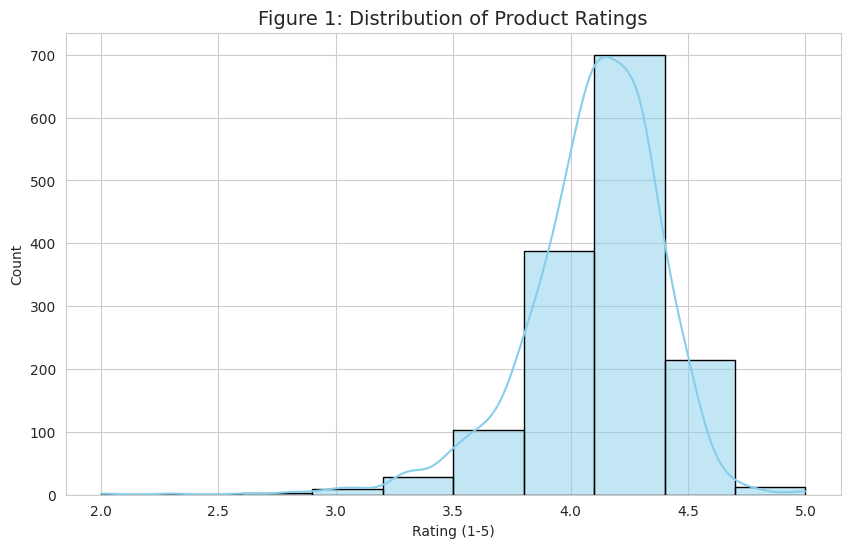

In [36]:
plt.figure()
sns.histplot(data['rating'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Figure 1: Distribution of Product Ratings', fontsize=14)
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.show()

The figure shows the class imbalance (most ratings are > 4.0).

**FIGURE 2: Distribution of Discounted Prices (Log Scale)**

We use log_scale=True as specified in the report to handle extreme price differences

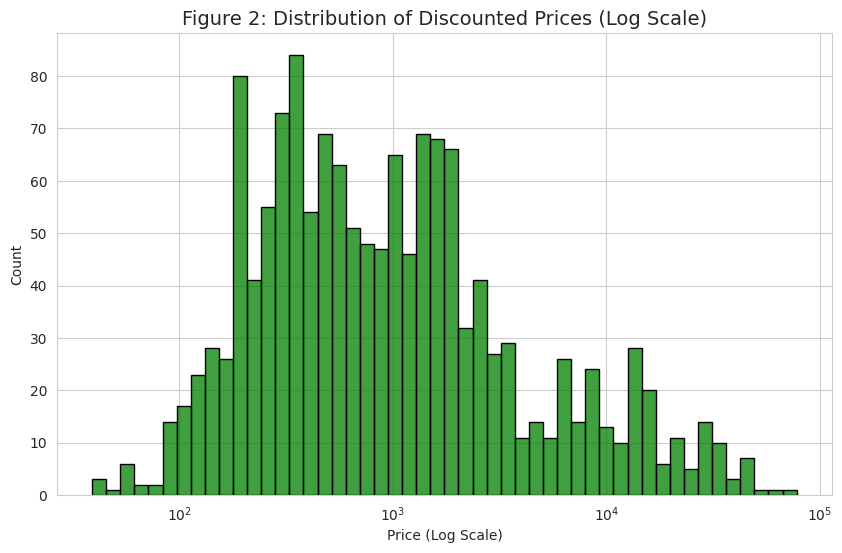

In [37]:
plt.figure()
sns.histplot(data['discounted_price'], bins=50, log_scale=True, color='green', edgecolor='black')
plt.title('Figure 2: Distribution of Discounted Prices (Log Scale)', fontsize=14)
plt.xlabel('Price (Log Scale)')
plt.ylabel('Count')
plt.show()

The figure shows price distribution using a Log scale because prices range from ₹100 to ₹70,000+

## Bivariate and Multivariate Analysis

We create a rounded rating column (e.g., 4.2 -> 4) for a better visualization

In [38]:
data['rating_rounded'] = data['rating'].round().astype(int)

**FIGURE 3: Impact of Promotions (Discount vs Rating)**

/tmp/ipython-input-2271535363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_rounded', y='discount_percentage', data=data, palette='viridis')


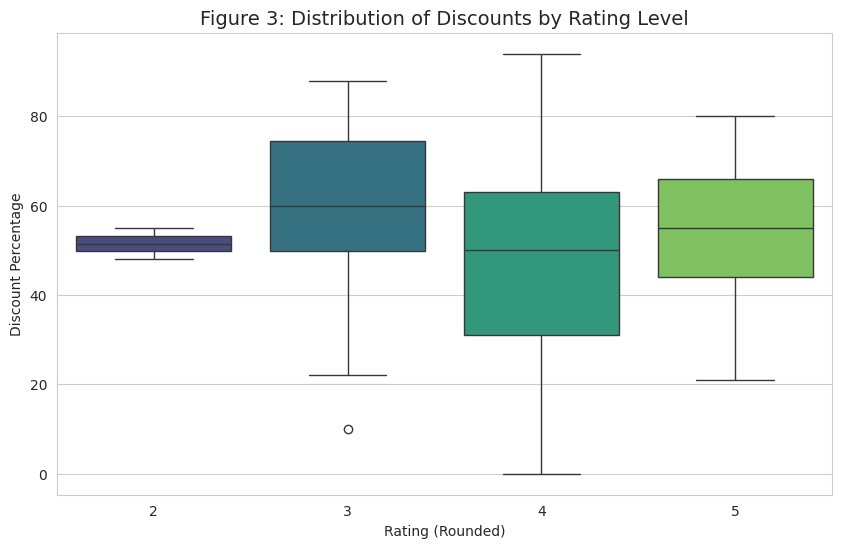

In [39]:
plt.figure()
sns.boxplot(x='rating_rounded', y='discount_percentage', data=data, palette='viridis')
plt.title('Figure 3: Distribution of Discounts by Rating Level', fontsize=14)
plt.xlabel('Rating (Rounded)')
plt.ylabel('Discount Percentage')
plt.show()

Boxplots proving that higher discounts don't necessarily mean better ratings .

**FIGURE 4: Price vs Rating Relationship**

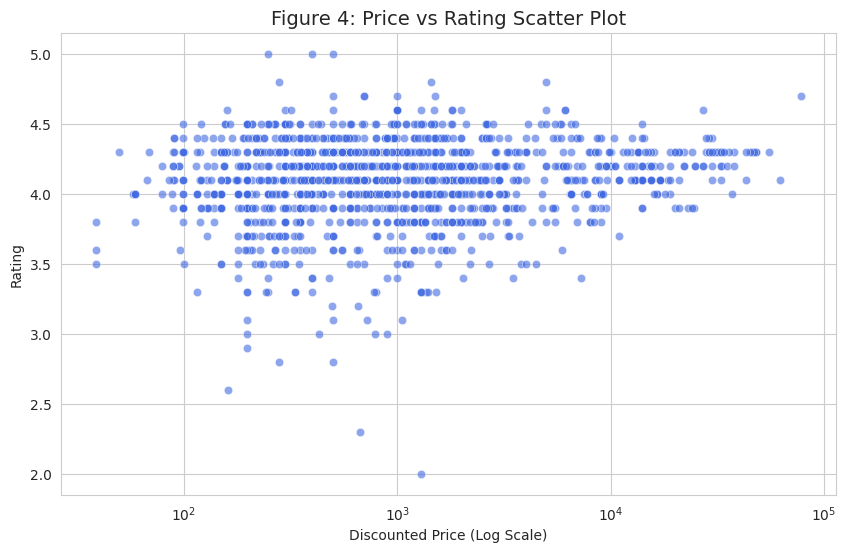

In [40]:
plt.figure()
sns.scatterplot(x='discounted_price', y='rating', data=data, alpha=0.6, color='royalblue')
plt.xscale('log') # The report explicitly mentions using Log Scale here
plt.title('Figure 4: Price vs Rating Scatter Plot', fontsize=14)
plt.xlabel('Discounted Price (Log Scale)')
plt.ylabel('Rating')
plt.show()

The scatter plot confirming there is no strong linear link between Price and Rating .

**FIGURE 5: Impact of Popularity (Categories)**

We sum the 'rating_count' (popularity) by 'main_category'

In [41]:
category_popularity = data.groupby('main_category')['rating_count'].sum().sort_values(ascending=False).head(10)

/tmp/ipython-input-2011479859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_popularity.values, y=category_popularity.index, palette='magma')


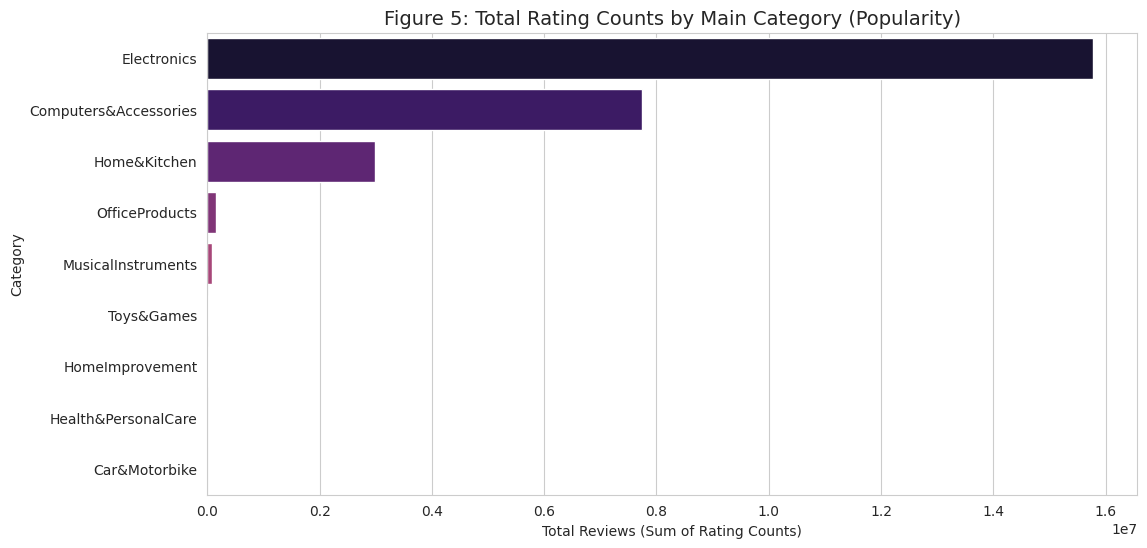

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_popularity.values, y=category_popularity.index, palette='magma')
plt.title('Figure 5: Total Rating Counts by Main Category (Popularity)', fontsize=14)
plt.xlabel('Total Reviews (Sum of Rating Counts)')
plt.ylabel('Category')
plt.show()

the bar chart showing "Electronics" is the most popular category.

**FIGURE 6: Correlation Matrix**

Select only relevant numerical columns

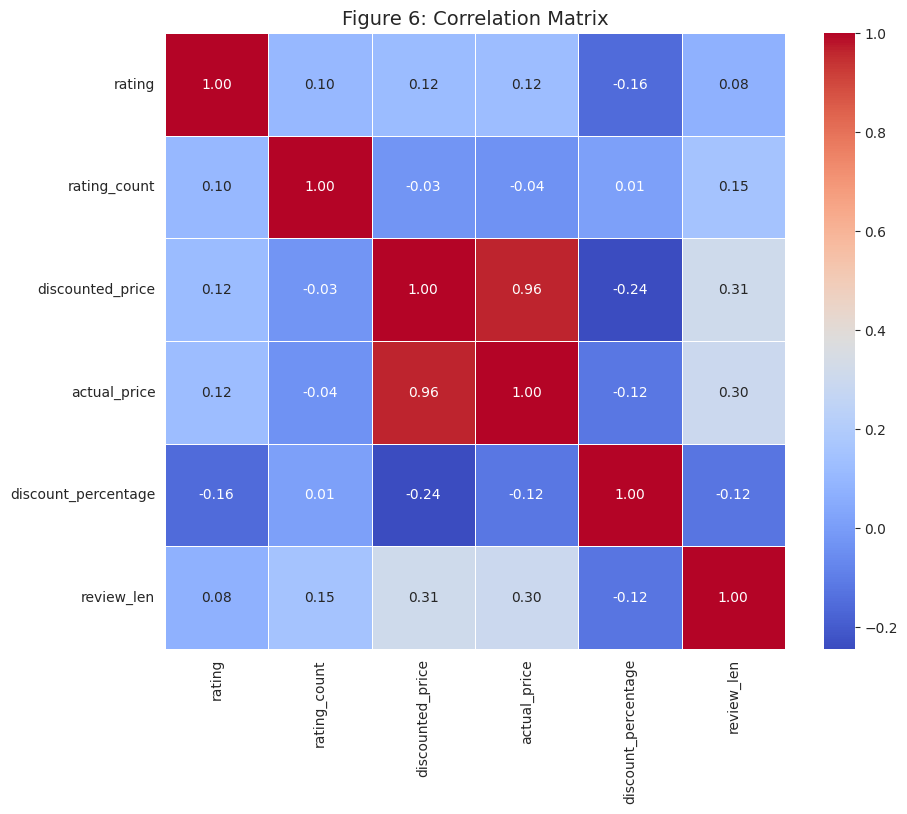

In [43]:
plt.figure(figsize=(10, 8))

numerical_cols = ['rating', 'rating_count', 'discounted_price', 'actual_price', 'discount_percentage', 'review_len']
corr_matrix = data[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 6: Correlation Matrix', fontsize=14)
plt.show()

The heatmap showing the correlation between variables (e.g., 0.96 between actual and discounted price, shows that these 2 variables are strong correlation so strong relationship).

# **PART 3 : Feature Engineering & Pre-processing**

We download necessary NLTK lexicons (dictionaries), including VADER for sentiment analysis and WordNet for lemmatization.

In [44]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In this part, we define a function to clean the text by converting it to lowercase, removing special characters, and applying Lemmatization (converting words to their root form, e.g., "better" to "good").

In [45]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [46]:
def nlp_pipeline(text):
    text = str(text).lower() # Convert to string and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers (Normalization)
    words = text.split() # Tokenize (split by space)
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Remove stopwords and Lemmatize (e.g., "better" -> "good", "running" -> "run")
    return " ".join(cleaned_words)

We apply this pipeline to create a processed_review column. This cleaned version is used later for counting significant words, while the raw text is kept for sentiment analysis.

In [47]:
data['processed_review'] = data['full_review'].apply(nlp_pipeline)

In [48]:
data.processed_review.head()

,processed_review
0,satisfiedcharging really fastvalue moneyproduc...
1,good braided cable type c devicegood quality p...
2,good speed earlier versionsgood productworking...
3,good productgood onenicereally nice productver...
4,good originaldecentgood one secondary usebest ...


We generate a sentiment_score ranging from -1 to +1 using the VADER tool. We apply this to the raw text (full_review) because VADER is optimized to interpret punctuation, capitalization, and emojis, which cleaning would remove.

In [49]:
sia = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sia.polarity_scores(text)['compound']

In [50]:
data['sentiment_score'] = data['full_review'].apply(get_vader_score)

We apply a logarithmic transformation to discounted_price to create log_price. This reduces the impact of massive price differences and makes the distribution more normal (like we said, the price is from ₹100 to ₹70,000+)

In [51]:
data['log_price'] = np.log1p(data['discounted_price'])

We convert the categorical main_category column into binary columns (0 or 1) so the machine learning algorithms can process this non-numeric data : it is the One-Hot Encoding.

In [52]:
data = pd.get_dummies(data, columns=['main_category'], prefix='cat', drop_first=True)

We split the data into Training (80%) and Test (20%) sets. We use Stratified Shuffle Split on the rating variable to ensure both sets have the exact same proportion of high and low ratings, solving the class imbalance issue

In [53]:
data['rating_rounded'] = data['rating'].round().astype(int)

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(data, data['rating_rounded']):
    train_set = data.iloc[train_index]
    test_set = data.iloc[test_index]

print(f"Training Set Shape: {train_set.shape}")
print(f"Test Set Shape: {test_set.shape}")

Training Set Shape: (1168, 33)
Test Set Shape: (292, 33)


We apply StandardScaler to numerical variables (rating_count, sentiment_score, etc.). This gives them a mean of 0 and standard deviation of 1, preventing large numbers (like 10,000 reviews) from dominating the model.

In [54]:
scaler = StandardScaler()
num_cols = ['rating_count', 'sentiment_score', 'review_len', 'word_count']

train_set[num_cols] = scaler.fit_transform(train_set[num_cols])
test_set[num_cols] = scaler.transform(test_set[num_cols])

display(train_set[['rating', 'sentiment_score', 'log_price', 'word_count', 'review_len']].head())

/tmp/ipython-input-3547130992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[num_cols] = scaler.fit_transform(train_set[num_cols])
/tmp/ipython-input-3547130992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[num_cols] = scaler.transform(test_set[num_cols])


,rating,sentiment_score,log_price,word_count,review_len
1152,4.1,0.335226,5.505332,-0.618523,-0.611008
288,3.8,-0.409784,8.987197,-0.218212,-0.234861
407,4.0,0.366503,4.605170,-0.350598,-0.398738
1317,4.4,-0.057608,8.593413,-0.464072,-0.421835
1338,4.2,0.384643,8.242756,0.106449,0.147334


# **PART 4: Model Training & Evaluation Strategy (TO DO, no testing yet)**

1. Define Models

We initialize Linear Regression (Baseline) , Random Forest (Bagging) to capture non-linearities , and XGBoost (Boosting) for state-of-the-art performance.

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

2. Define Features and Target

We separate the features (X) from the target (y). We drop intermediate columns like full_review (text) and main_category (string) because the model only accepts the numerical vectors we created in Part 3. We use the scaled training data from the previous step.

In [69]:
train_set.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,float64
rating_count,float64
about_product,object
user_id,object


In [72]:
cat_cols = [col for col in train_set.columns if col.startswith('cat_')]
selected_features = ['log_price', 'sentiment_score', 'rating_count', 'review_len', 'word_count'] + cat_cols

X_train = train_set[selected_features]
y_train = train_set['rating']

X_test = test_set[selected_features]
y_test = test_set['rating']

3. Cross-Validation Strategy

Instead of a single train/test split which can be lucky or unlucky, we split the training data into 5 Folds. We train 5 times and average the scores to get a reliable estimate of the model's stability. We use K-Fold (K=5) to evaluate performance stability before final testing.

We use negative MSE because scikit-learn maximizes scores (higher is better), but for error metrics, lower is better.

In [73]:
results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'))

    results[name] = {
        "CV_RMSE": -cv_results['test_neg_root_mean_squared_error'].mean(),
        "CV_MAE": -cv_results['test_neg_mean_absolute_error'].mean(),
        "CV_R2": cv_results['test_r2'].mean()
    }
    print(f"{name} CV Complete.")

Linear Regression CV Complete.
Random Forest CV Complete.
Gradient Boosting CV Complete.


# **PART5: Comparative Analysis of Results**

Now we train on the full 80% training set and evaluate on the 20% hold-out test set to generate the final metrics. We calculate RMSE (penalizes large errors), MAE (average error), and $R^2$ (variance explained) to create the final comparison table.

In [74]:
final_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    final_results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

In [75]:
results_df = pd.DataFrame(final_results)
print("\nTable 1: Performance Metrics by Model")
display(results_df)


Table 1: Performance Metrics by Model


,Model,MAE,RMSE,R2
0,Linear Regression,0.205515,0.272720,0.041095
1,Random Forest,0.175990,0.249955,0.194500
2,Gradient Boosting,0.178564,0.253275,0.172960


We plot the bar chart of the visualization of the results.

/tmp/ipython-input-969897675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')


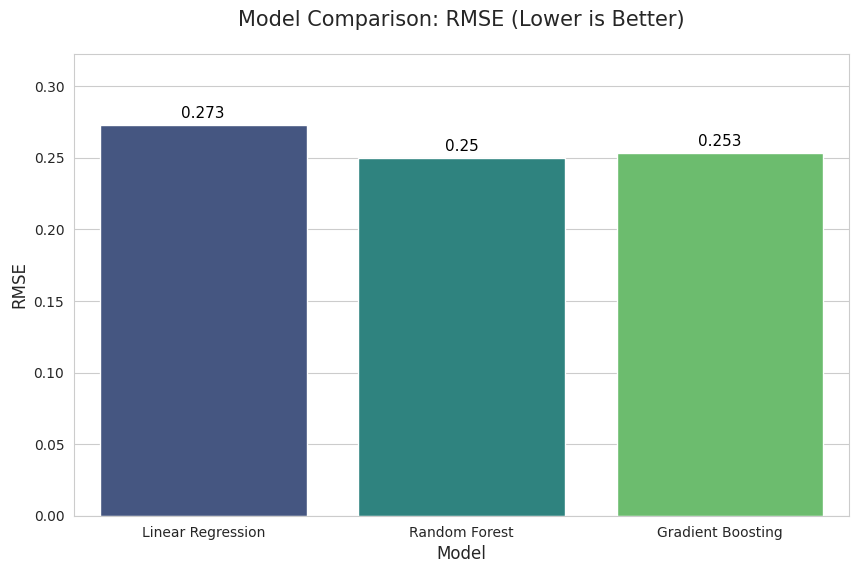

In [78]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Model Comparison: RMSE (Lower is Better)', fontsize=15, pad=20)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Model', fontsize=12)

for index, row in results_df.iterrows():
  plt.text(index, row.RMSE + 0.005, round(row.RMSE, 3), color='black', ha="center", fontsize=11)

plt.ylim(0, results_df['RMSE'].max() + 0.05)
plt.show()

the Gradient Boosting model slightly outperforms Random
Forest and significantly outperforms Linear Regression across all metrics. With an MAE of 0.18,
the average error is less than one-fifth of a star. For instance, if the actual rating is 4.2, the model
will typically predict between 4.02 and 4.38.